In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from glob import glob
import seaborn as sns

# Getting Started



This tutorial assumes you know python, at least as an *advanced beginner*.  

If you're not there, there are lots of free resources online to get you there and you can learn it in a few hours.  I can recommend the [Intro to Python course on DataCamp](https://www.datacamp.com/courses/intro-to-python-for-data-science?utm_source=learnpython_com&utm_campaign=learnpython_tutorials).

## What is Conda?



Conda is a package manager that allows you to access python libraries with different versions when you need to.  If you installed python with Anconda, you already have it.  If you got python some other way (common for Mac users) you may not already have it.

### How do I install Conda?

You can go get [Anaconda](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html) or choose "miniconda" instead.  The difference is which packages they come with.  Anaconda includes nearly all the data analysis libraries most commonly used.  Miniconda is just conda without any pre-installed libraries.  You can still get all the libraries by explicitly downloading them and if you follow my instructions on how to manage environments, you'll end up doing exactly that over and over again so it's really up to you.

### What about pip?


Close observers may say "What about `pip install`"?  You can use `pip install` if you want to, but conda plays better with environments.  I mostly just don't recommend going back and forth as sometimes the pathing gets inconsistent and conda isn't aware what you've installed with pip and vice versa, so if you're a `pip install` user and want to use `virtualenv` instead of `conda install` and `conda env`, that's also up to you.

### What are Environments?

When a python interpreter is called to take a text document and evaluate it as code, it often accesses _other_ code from _other_ files.  That's what an `import` function does.  

But the code that those libraries depend on changes over time.  Some repositories are more actively developed than others, too and may have frequent updates. If you update willy nilly, maybe your code breaks.

Conda environments allow you to freeze the dependencies for a given project, making sure it will continue to work in the future.

Conda environments are also _exportable_, meaning you can send your code plus an environment document (usually a `.yml`) to someone else, have them load up that environment and ensure that your code will work on their machine the same as it did yours.  They're key to containerizing python scripts.

Conda environments also allow you to keep older versions of the python interpreter around if you need it.  Have some python 2 code?  Create a `python2` environment and run it there.  You can also create environments for _other_ interpreters.  I use R pretty often.  But there's lots more!  


### How to use environments, a few useful hints.

#### Create a New Environment

`conda create --name NewEnv`

#### Create an environment with a specific version of python and install libraries at the same time.

`conda create --name VerySpecificEnv python=2.7 numpy=1.11 scipy pillow`

#### Create an environment from an environment.yml
`conda env create --file environment.yml`

#### Export your current environment
`conda env export > environment.yml`

#### Activate an environment you've already created

##### Windows
`conda activate NewEnv`

##### Mac/Linux
`source activate NewEnv`

#### Go back to your base environment
`conda activate`




## Jupyter Lab IDE

I do nearly all my work in the Jupyter Lab IDE.  Background on jupyter here https://jupyter.org/.  

Jupyter notebook is web application that allows you to spin up a python (or other!) kernel and run interactive code.  Each cell can be executed in any order,  you can break them up, re-run some bits and not others

If you have Anaconda, you have Jupyter.

1. Open Anaconda Prompt (Windows: search from the task bar, macOS/Linux: open Terminal from the Launchpad)

2. Navigate to whatever you want your root directory to be (in my case, it's the Documents folder on my One Drive so everything is sync to sharepoint as I work) and execute this command

`jupyter lab`

A browser window will automatically open in your default broswer that looks like this (you'll see a view of the markdown editor I'm writing this in):

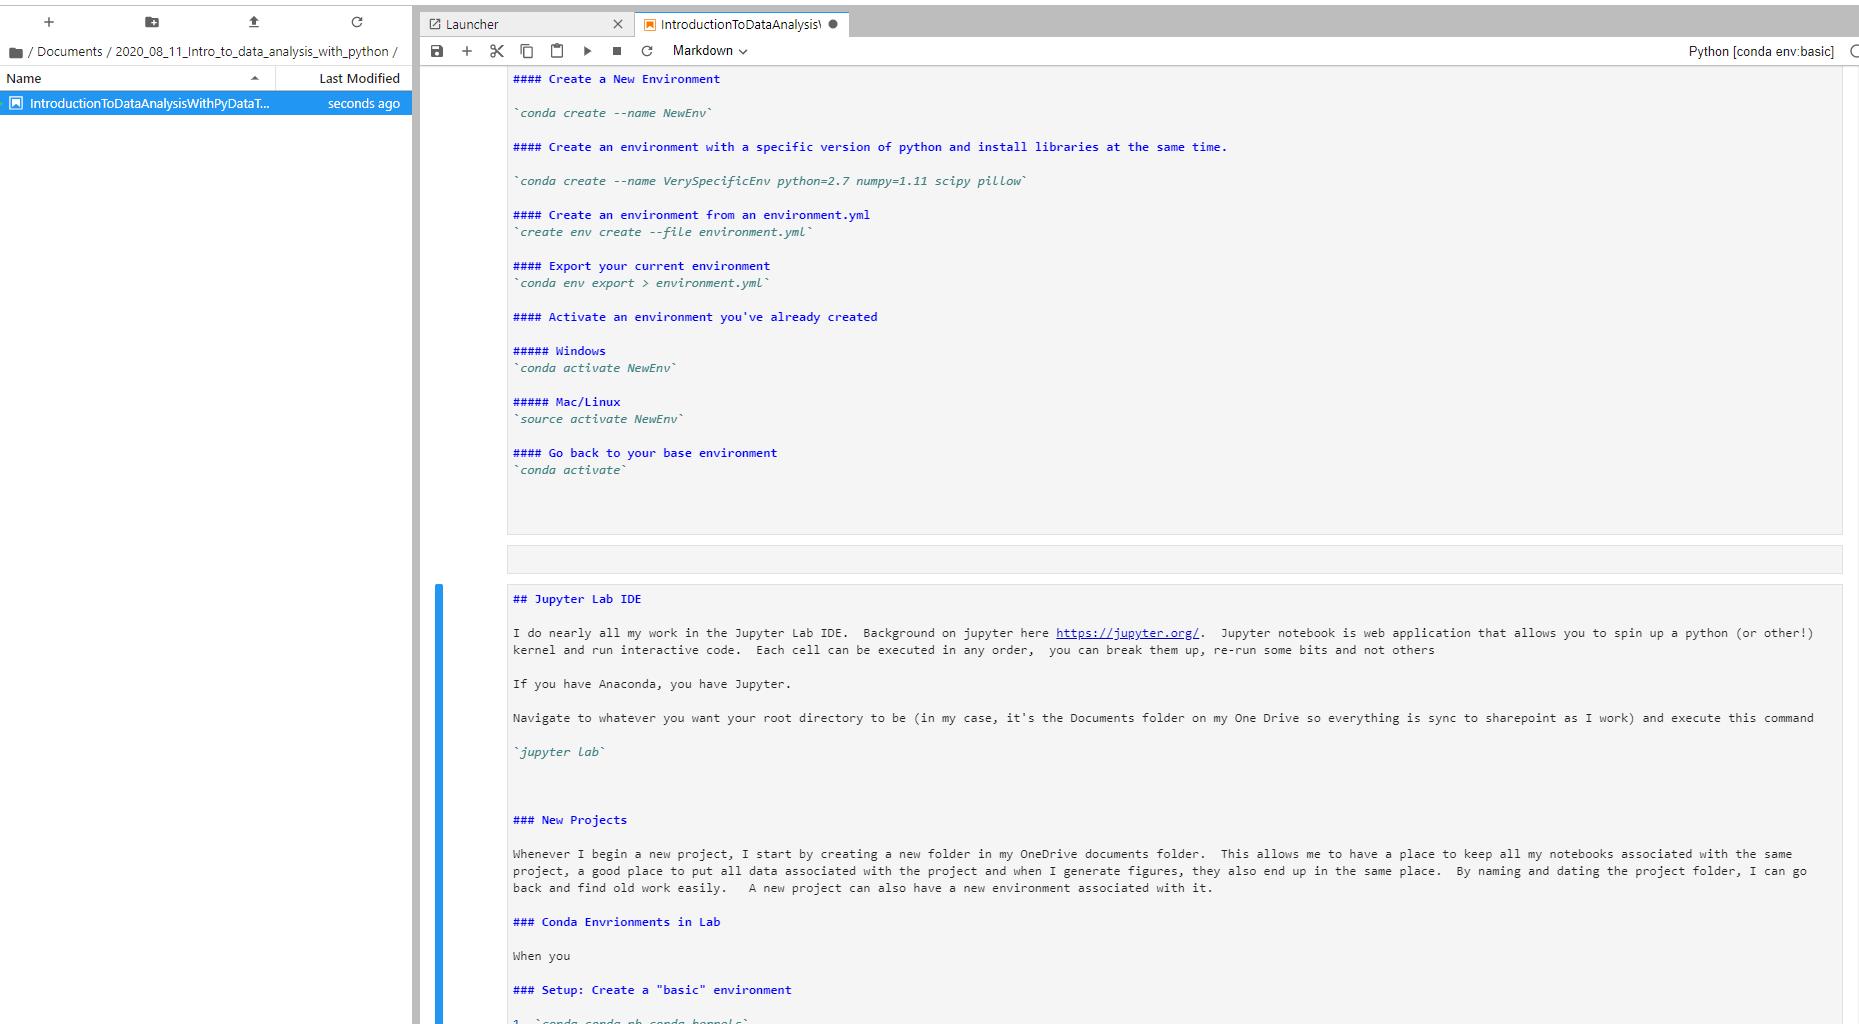

On the left there, you'll see a file navigator.  On the right are tabbed windows of whatever files you're currently editing.  By default, if you're not currently in progress for a project, a launcher window will open allowing you to create a new file.  The basic file type is a notebook, but you can also use jupyter to create text files, open a new interactive console, whatever your command line interface is default for your system (for example, terminal for Mac and CMD for Windows), or a markdown file. 

### Basics of a Jupyter Notebook

Jupyter notebooks are super cool, can be used in 80 gazillion ways and they have annual conferences on how they're being used by everyone from NASA to Netflix to do those things.  So I won't get into very much detail but the basic idea is that jupyter notebooks are broken up into _cells_ which are independently executeable blocks of code whose results stay in memory after it's done executing.

These allow you to execute some code, look at the results, execute the code again or change the code and execute it or execute different code, all while keeping the state of memory active.  This is relatively par for the course for an interactive IDE, but because the cells are independent, you can execute them in any order you choose to.  You could see how this might be helpful for data analysis, exploration, and visualization.

I generally reserve my first cell for import statements and any general "context" setting variables like this:

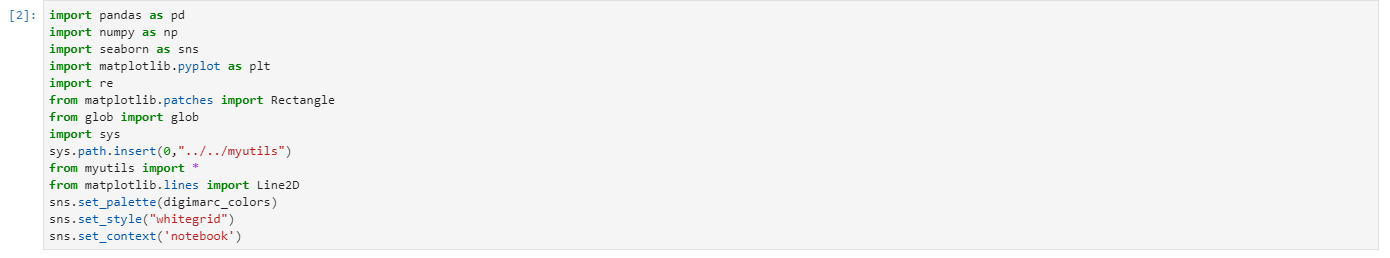

This allows me to run all my imports once.  It also gives me a place to put any subsequent imports I may realize I need as I work so that if I restart the kernel at any point, I can get all my imports back at once.  

It also means that if I have to do _new_ work on a similar theme, I can very easily recall all the libraries I'm going to need to access and I can even copy paste.  

The next few cells I use for ETL (I will go into details about how that's done later) and global variables.  Similarly, this allows me to get right back to a memory state I need to be in if I have to restart my kernel. This also makes reproducibility much easier.

#### In summary:

Types of Cell Contents
1. Import Statements
2. global variables and helper functions
3. ETL

The subsequent cells I use for analysis and data visualization, as a calculator, whatever I want.

### Starting New Projects

Whenever I begin a new project, I start by creating a new folder in my OneDrive documents folder. This allows me to have a place to keep all my notebooks associated with the same project, a good place to put all data associated with the project and when I generate figures, they also end up in the same (backed up and sharable) place.  By naming and dating the project folder, I can go back and find old work easily.   A new project can also have a new environment associated with it.   

### Conda Environments in Lab

With a couple of libraries, you can set up lab to give you launchers for all of your created environments.  Meaning you can start any new notebook in any environment and change any existing notebook to a different environment.  You just have to do a few things.

#### Setup

While in your root conda environment (that is, your base or if you haven't turned on any environment), run this command.

`conda install nb_conda_kernels`

This tells jupyter to look for other kernels in notebook.  

I then create a "basic" environment (named `basic`) that has all the core libraries I use constantly _plus_ ipykernels.  ipykernels tells nb_conda_kernels "Hey, list me in the launcher".

`conda create --name basic python=3.6 pandas numpy scipy matplotlib seaborn ipykernel statsmodels`

You may find you need more libraries.  That's fine.  You can always go to Anaconda prompt, activate the library you're interested in, and then 

`conda install newLibrary`

But when I'm working with _new_ libraries, or libraries I'm not sure I will use a lot or libraries I'm worried aren't well maintained, I can clone the basic environment and then add those questionable libraries to it.

# Data Analysis with Pandas

Pandas is my main data analysis library.  It is extremely powerful, well maintained and integrates well with other NumFocus libraries such as numpy, scipy, and all kinds of plotting libraries.  It can handle imports from many kinds of data from SQL statements to excel files and of course .csv and .json and .pkl.   It organizes data into two main structures: Series (1 dimensional data) and DataFrame (2 dimensional data or tables).

## DataFrame and Series Objects

A Series object is an array where the index can be any hashable type - strings, tuples, boolean, integer.  It's the object that is returned when you look for a row in a DataFrame or a column.  It can be constructed out of a dictionary (the keys become the index), a list (the default index is integers), or a numpy array (the default index is again integers).  



### Creating a Series using a numpy array

In [ ]:
pd.Series(np.arange(10))

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int32

### Creating a Series using a dictionary

In [ ]:
pd.Series({"A":"Z", "B":"Y", "C":"X", "D":"W", "E":"V", "F":"U", "G":"T", "H":"S", "I":"R", "J":"Q", "K":"P", "L":"O", "M":"N", "N":"M", "O":"L", "P":"K", "Q":"J", "R":"I", "S":"H", "T":"G", "U":"F", "V":"E", "W":"D", "X":"C", "Y":"B", "Z":"A"})

A    Z
B    Y
C    X
D    W
E    V
F    U
G    T
H    S
I    R
J    Q
K    P
L    O
M    N
N    M
O    L
P    K
Q    J
R    I
S    H
T    G
U    F
V    E
W    D
X    C
Y    B
Z    A
dtype: object

Contrast this with a dataframe, which is multiple columns of `pd.Series` objects where the index of the Series objects are the same across Series and the name of the Series is the column name of the DataFrame

### Creating a DataFrame using Series objects

In [ ]:
a = pd.Series({"A":1, "B":2, "C":3}, name="Order")
b = pd.Series({"A":True,"B":False,"C":False}, name="?Vowel")
c = pd.Series({"A":"Apple","B":"Banana","C":"Cantaloupe"},name='Example of Fruit')
example = pd.DataFrame([a,b,c]).T 
example

,Order,?Vowel,Example of Fruit
A,1,True,Apple
B,2,False,Banana
C,3,False,Cantaloupe


### Accessing specific cells, series, or slices of a dataframe

Because dataframes are hash tables, they can be accessed like dictionaries with just the scripting brackets if you want a specific column (the outer key). For example, to access the `Order` Series in the `example` DataFrame:

In [ ]:
example['Order']

A    1
B    2
C    3
Name: Order, dtype: object

Grabbing a row this way, won't work though:

In [ ]:
example['A']

KeyError: 'A'

To get all the columns from a particular row, you can use `.loc`:

In [ ]:
example.loc['A',:]

Order                   1
?Vowel               True
Example of Fruit    Apple
Name: A, dtype: object

The `:` symbol says "give me everything you've got".

You can provide lists or sets of columns or rows that you want to access:

In [ ]:
example[['Order','?Vowel']]

,Order,?Vowel
A,1,True
B,2,False
C,3,False


You can also specify a specific subset of rows or columns that you want to access:

In [ ]:
example.loc['A':'B','Order']

A    1
B    2
Name: Order, dtype: object

The `.iloc` function allows you to go by counts of indexers - this can be useful but it often ends up confusing if you have indexing that isn't integers so beware! To access all columns of the 0th row:

In [ ]:
example.iloc[0,:]

Order                   1
?Vowel               True
Example of Fruit    Apple
Name: A, dtype: object

### Boolean Indexing

This is a quick introduction to this but because dataframes are built on numpy arrays, it's quite possible to pass a boolean array as a scripting parameter and just get the values you need. 

The `example` DataFrame has three rows. You can access a given row by passing a list with `True` in the corresponding index.

In [ ]:
# Access the first row only
example[[True, False, False]]

,Order,?Vowel,Example of Fruit
A,1,True,Apple


In [ ]:
# Access the second row only
example[[False, True, False]]

,Order,?Vowel,Example of Fruit
B,2,False,Banana


In [ ]:
# Access the third row only
example[[False, False, True]]

,Order,?Vowel,Example of Fruit
C,3,False,Cantaloupe


In [ ]:
# Access all rows
example[[True, True, True]]

,Order,?Vowel,Example of Fruit
A,1,True,Apple
B,2,False,Banana
C,3,False,Cantaloupe


In [ ]:
# Access the first two rows
example[[True,True,False]]

,Order,?Vowel,Example of Fruit
A,1,True,Apple
B,2,False,Banana


You can also use the values in a Series object for Boolean indexing. In the following example, I access all rows where the `?Vowel` Series has a `True` value.

In [ ]:
example[example["?Vowel"]]

,Order,?Vowel,Example of Fruit
A,1,True,Apple


The function `np.logical_not` can be used to access rows where `example["?Vowel"]` is `False`

In [ ]:
example[np.logical_not(example["?Vowel"])]

,Order,?Vowel,Example of Fruit
B,2,False,Banana
C,3,False,Cantaloupe


The important thing is that the boolean array needs to be the same length as the dataframe (i.e. the number of rows) so you'll know which values are in and which are out.  Here's a simple example from numpy array to illustrate.  

In [ ]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Is each element divisible by 2?
arr%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

In [ ]:
# Access all elements divisible by 2
arr[arr%2==0]

array([0, 2, 4, 6, 8])

## Data Munging

Data munging, also known as "Extract Load and Transform" (or ETL) is the process by which you take data in any kind of raw form and format it and transform it so that it can be analyzed. 

We're going to pretend for the sake of simplicity that you're trying to get it into a tabular form, although there will be times when a different form may be appropriate, like perhaps a graph.

Exactly how to do data munging is far beyond the scope of an introduction.  The word "munge" is used specifically because it's an amorphous smooshy process, varying with every data source and sometimes adapting to the source as it changes over time. 

Munging is done in these steps:

1. Parse/Extract
2. Load
3. Transform

### Parsing and/or extracting


For highly structured data that is governed by schema or rules, you can write scripts to parse and/or extract data. These scripts can be relied upon without a ton of risk. For example, it may be a SQL select statement:

`SELECT column1, column2 FROM table_name;`

That statement may be valid indefinitely as we've got a data engineer who insures that and does the parsing for you.

The type of parsing function depends on the data!

If the data is the log from a tool, like the spectrophotometer, there will be a fixed output that can be reliably parsed even though its generating new files with each measurement.  To create the parsing function, you will probably need to look at raw outputs or sometimes you can get that information from documentation. 

Here's some sample code I wrote, doing ETL on the item timer logs:

In [ ]:
source = r"\\corp\dfs\Departments\Engineering\Commercial\Delivery\2019\Walmart_150_Testing\R2_0_14_Results"
files = glob(os.path.join(source,"*.json"))
metadata = pd.DataFrame()
for f in files: 
    new = pd.DataFrame(json.load(open(f))['testSet'])
    metadata = pd.concat([metadata,new], ignore_index=True)
for col in ['startTime', 'endTime']:
    metadata[col] = pd.to_datetime(metadata[col])
metadata = metadata.sort_values(by='endTime')

rawdata = pd.DataFrame()
files = glob(os.path.join(source, "*.log"))
for f in files:
    new = pd.read_csv(f)
    rawdata = pd.concat([rawdata,new],ignore_index=True)
rawdata['timestamp'] = pd.to_datetime(rawdata['timestamp'])

for i, row in rawdata.iterrows():
    a = metadata['startTime']<=row['timestamp']
    b = metadata['endTime']>=row['timestamp']
    try:
        metarow = metadata[np.logical_and(a,b)].index[0]
    except:
        continue
    for col in ['cashier', 'digimarcBarcodePercentage','scanner']:
        rawdata.loc[i, col] = metadata.loc[metarow,col]
    rawdata.loc[i, 'setLabel'] = metadata.loc[metarow, 'cashier']+"_"+metadata.loc[metarow, 'setLabel']

for i, row in rawdata.iterrows():
    if i-1 <0:
        continue
    rawdata.loc[i, 'ringTime'] = (row['timestamp']-rawdata.loc[i-1,'timestamp']).total_seconds()
rawdata = rawdata[rawdata['code'] != "A898989898981"]

I begin by declaring where the files are located - and I use glob (which is a file selection library much like what you'd be used to in bash or cmd) to choose first the json files where the metadata or experimental conditions are stored.  That's the first part of extra.  I then "transform" the timedate stamp strings into pandas.datetime objects so I can do things like sort them by date and time.  I also concat them so they can be in the same table together.

The next chunk is the actual checkout data.   The log (at this time, I have subsequently requested that the experiment condition data be recorded at the same time as the decode data) is just a GTIN and a datetime.  That itself is the result of a parsing of the raw output from the communication between a scanner and the CPU it's connected to.  Again, I transform the timedate stamps so that I can reason about them.  

The next step is to join the tables.  This can be done more elegantly in SQL but it's not too bad in pandas and it gives you a chance if necessary to catch exceptions.  So I iterate through each row of the table and "try" to look up during that time, where were we in the metadata?  If we find it, we take the experiment info.  If we don't, we skip it, leaving that row mostly blank which makes it easy to find and deal with later.  I also as I'm going create a unique set label so we can look at what order the data was collected in. 

The last little bit is a "transform" (but really it's a calculation) looking at the timestamp of a decode and measuring the time delta between it and the guy ahead of it in the queue.  

The last munging I do here is to remove the rows that were the delimiter boxes.  I needed them up to this point to calculate subsequent ring times, but now we can just filter them out.  

# Scientific Computing

## Numpy

Numpy is a comprehensive mathmatical library ("numerical python") with matrix math and all kinds of goodies.  The standard way to import numpy is

`import numpy as np`

It's so common, all the searches you do on stack overflow will refer to numpy as 'np'.

### ndarrays

The basic unit of numpy arrays ar ndarrays - that is, _n-dimensional_ arrays. The constructors can be single values, empty arrays, arrays filled with the same value, or lists or lists of lists or lists of lists of lists. They index different dimensions as tuples.

In [ ]:
a = [[1,2,3],[4,5,6]]
arr = np.array(a)
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
arr[0,2]

3

That's the first row, third element in that row (or third column if you prefer).

This continues if you have 3 or more dimensions.  3 dimensions are common for image data.  Your first indexer will be the x location of a pixel, the second indexer will be the y location of the pixel, and then the third indexer will indicate what layer you're on.  A typical CMYK image will have the shape (w,h,4).



#### Useful attributes of the numpy array

In [ ]:
arr.shape

(2, 3)

In [ ]:
arr.max()

6

In [ ]:
arr.min()

1

In [ ]:
arr.mean()

3.5

In [ ]:
arr.mean(axis=1) #This is the mean of each row.

array([2., 5.])

In [ ]:
arr.mean(axis=0) #This is the mean of each column.

array([2.5, 3.5, 4.5])

Another helpful feature of numpy is that you can do arthmetic operations on it as if they were just values

In [ ]:
arr + 1

array([[2, 3, 4],
       [5, 6, 7]])

In [ ]:
arr**2

array([[ 1,  4,  9],
       [16, 25, 36]], dtype=int32)

If you have two arrays of the same dimensionality, you can do element wise calculations on them.

In [ ]:
arr2 = np.array([[3,2,1],[7,8,9]])
arr+arr2

array([[ 4,  4,  4],
       [11, 13, 15]])

In [ ]:
arr*arr2

array([[ 3,  4,  3],
       [28, 40, 54]])

If you want to do matrix math, however, you need to call functions that specify that.  The default for numpy is to treat the values as iterable elemtns, not whole matrices.

In [ ]:
a = np.array([2,3,5])
b = np.array([7,11,13])
a*b #element-wise each value multiplied by the value with the same index in the second array

array([14, 33, 65])

In [ ]:
a.dot(b) #dot multiplication of vectors. Numpy treats the second one as being size (3,1),

112

### Functions I use a lot

#### np.zeros and np.ones



Numpy arrays are immutable.  If you're creating data on the fly, you're continually creating and trashing new references.  It's often a good practice to create the container that your data are going into ahead of time.  Creating an array of zeros and then using some process to fill them up is faster than repeatedly updating (if you don't know what size your data is going to be ahead of time, create lists of lists and then cast to numpy).

An easy way to do that in np.zeros.  np.zeros just takes a tuple shape parameter and it'll give you a numpy array with those dimensions initalized with the value that's appropriate for the data type (default is float)

In [ ]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Now you have a 4x4 matrix that you can put values in.

np.zeros also takes a kwarg for data type

In [ ]:
np.zeros((4,4),dtype=bool)

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

Related function:  np.zeros_like

np.zeros_like takes an another array as its parameter, takes the shape parameter of _that_ array and makes you an array of the same shape filled with your default value.

In [ ]:
np.zeros_like(arr)

array([[0, 0, 0],
       [0, 0, 0]])

there is also a np.ones function that does everything zeros does but fills with, you guessed it, 1.    This really only looks even a tiny bit unexpected when you do boolean data types, so I'll show that

In [ ]:
np.ones((4,4),dtype=bool)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

I use these in a lot of different ways.  Here's a bootstrap function for finding the confidence interval of a linear regression line

In [ ]:
def bootstrap_lm(data, n=1000):
    numRows = data.shape[0]
    from scipy.stats import linregress
    M = np.zeros(n)
    B = np.zeros(n)
    for repeat in range(n):
        sample = data[np.random.choice(np.arange(numRows))] #samples with replacement by default
        m,b,r,p,st = linregress(data[:0],data[:1])
        M[repeat] = m
        B[repeat] = b
    return M,B
    

And here's a function using boolean np.ones for querying a dataframe

In [ ]:
def query(data, columns, values):
    import pandas as pd
    import numpy as np
    assert isinstance(columns, list), "Provide fields as list"
    assert isinstance(values, list), "Provide values as list.  For multiselect matches, provide a list of lists"
    assertEqual(len(columns),len(values)), "Must provide the same number of fields and values, for multiselect matches, provide a list of lists"
    hits = np.ones(len(data),dtype=bool) #starts by including all rows
    for column, value in zip(columns, values):
        if isinstance(v,list):
            orhits = np.zeros(len(data),dtype=bool) #because this is an 'or' function, it starts by *excluding* all rows
            for v in value:
                orhits = np.logical_or(orhits,data[column]==v)
            hits = np.logical_and(hits,orhits)
        else:
            hits = np.logical_and(hits, data[column]==value)
    return hits #this is a 1 dimensional boolean array that can be used as an index for the full data frame.  More on that later.

#### np.random.*



I use numpy's various random functions each and every day - from generating bootstrap sample as above to kicking out random variate samples from a binomial to model decodibility, they're invaluable. And high quality.  